51


<ipython-input-5-18df3384cd47>:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  z=np.vstack(z)


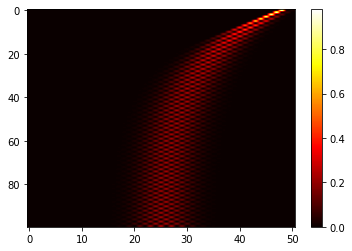

In [5]:
#Recurrencia Paper

from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

numero_fleas=50
P0=[0]*50+[1]

def Pt(t):
    P=P0
    P_m_tiempofijo=[]
    P_tiempo=[]
    for i in range(0,t+1):
        for n in range(numero_fleas+1):
            if n!=0 and n!=numero_fleas:
                P_tmasuno=((n+1)/numero_fleas)*P[n+1]+((numero_fleas-(n-1))/numero_fleas)*P[n-1]
            elif n==0:
                P_tmasuno=float((1/numero_fleas))*P[1]
            elif n==numero_fleas:
                P_tmasuno=(1/numero_fleas)*P[numero_fleas-1]
            P_m_tiempofijo.append(P_tmasuno)
        P=P_m_tiempofijo
        P_m_tiempofijo=[]
        P_tiempo.append(P_m_tiempofijo) 
    return P_tiempo



x=list(range(51))
y=list(range(1500+1))
z1=Pt(100)
z=filter(None, z1)
print(len(Pt(100)[99]))


    
z=np.vstack(z)
im = plt.imshow(z, cmap='hot', aspect='auto')
plt.colorbar(im, orientation='vertical')
plt.show()

<ipython-input-6-49281fc90f02>:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  z=np.vstack(z)


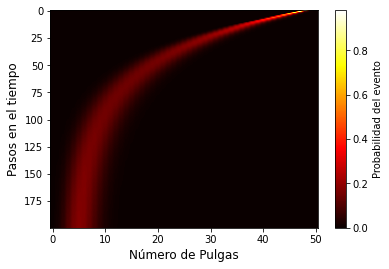

In [6]:
#Recurrencia Propuesta

from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

numero_fleas=50
P0=[0]*50+[1]
k=10


def Pt(t):
    P=P0
    P_m_tiempofijo=[]
    P_tiempo=[]
    for i in range(0,t+1):
        for n in range(numero_fleas+1):
            if n!=0 and n!=numero_fleas:
                P_tmasuno=((n+1)/numero_fleas)*P[n+1]+((numero_fleas-(n-1))/numero_fleas)*(1/(k-1))*P[n-1]+((numero_fleas-n)/numero_fleas)*((k-2)/(k-1))*P[n]
            elif n==0:
                P_tmasuno=float((1/numero_fleas))*((k-1)/k)*P[1]
            elif n==numero_fleas:
                P_tmasuno=(1/numero_fleas)*(1/k)*P[numero_fleas-1]
            P_m_tiempofijo.append(P_tmasuno)
        P=P_m_tiempofijo
        P_m_tiempofijo=[]
        P_tiempo.append(P_m_tiempofijo) 
    return P_tiempo



x=list(range(51))
y=list(range(1500+1))
z1=Pt(200)
z=filter(None, z1)


    
z=np.vstack(z)

im = plt.imshow(z, cmap="hot",aspect='auto')
cbar = plt.colorbar(im)
cbar.set_label('Probabilidad del evento')
plt.ylabel('Pasos en el tiempo',size=12)
plt.xlabel('Número de Pulgas',size=12)
plt.show()

In [38]:
# Sistema de Simulaciones bajo distribución normal, 
# Se puede cambiar la distribución en la función "Randomizer"
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random
import copy



#numero de perros
k = int(10)
#numero de pulgas
n = 50
#numero de pulgas en cada perro

#Función random, escupe m parejas de números random,
# el primero de 0 a N y el segundo de 0 a K

def randomizer(m,N,K):
    randomlist=[]
    for i in range (m):
        n = random.randint(0,N)
        k = random.randint(0,K)
        randomlist.append(n)
        randomlist.append(k)
    return randomlist

def conteo_pulga_perro(numero_de_perros):
    a=[]
    b=[]
    for i in range(numero_de_perros):
        a.append(b)
    return a


#Función que bota qué pulgas están en cada perro para UN solo tiempo t
def nfleas(t):
    list_of_fleas = list(range(1,51))
    Pulgas_perros=[list_of_fleas]+[[] for _ in range(k-1)]
    A = [list_of_fleas]    
    B = Pulgas_perros
    for i in range(t):
        R = randomizer(1,n,k-1)
        a = int(R[0])
        b = int(R[1])
        if a in B[b]:
            B=B
            i=i+1
        else:
            for j in range(len(B)):
                if a in B[j]:
                    B[j].remove(a)
                    B[b].append(a)
            i=i+1
    return B

#numero de pulgas para el perro Anik -perro 1-
def y1(t):
    Y = []
    T = [i for i in range(t)]
    for i in T:
        L = nfleas(i)[0]
        k = int(len(L))
        Y.append(k)
    return Y
def y(t):
    Y = []
    W = y2(t)
    for i in range(int(len(W))):
        A = W[i]
        k = A[0]
        Y.append(k)
    return Y




#Histograma -normalizado- de cantidad de pulgas en Anik
def Histograma(t):
    List=[]
    for j in range(n+1):
        B=y(t)
        a=float(B.count(j))
        List.append(a/(t))
    return List




#Conteo pasos en el Tiempo
def T(t):
    T=[int(i) for i in range(t)]
    return T




# Sistemas que tienen en cuenta el -macroestado- 
# En base a esto, el número de microsistemas consistentes viene dado
# por el coeficiente MULTINOMIAL

#Qué pulga está en cada perro desde 0 HASTA el tiempo t
def nfleas_list(t):
    list_of_fleas = list(range(1,51))
    Pulgas_perros=[list_of_fleas]+[[] for _ in range(int(k-1))]   
    B = Pulgas_perros
    A = []
    for i in range(t):
        R = randomizer(1,n,k-1)
        a = int(R[0])
        b = int(R[1]) 
        D=copy.deepcopy(B)
        A.append(copy.deepcopy(D))
        if a in B[b]:
            B=B
        else:
            for j in range(len(B)):
                if a in B[j]:
                    B[j].remove(a)
                    B[b].append(a) 
    return A
# Reproduce la función nfleas correctamente
def nfleas_tiempo(t):
    A = nfleas_list(t)[t-1]
    return A

# Recuento de pulgas en todos los perros
def y2(t):
    t=int(t)
    Z = nfleas_list(t)
    W = list()
    for i in range(t):
        A = Z[i]
        V = []
        for j in range(len(A)):
            L=len(A[j])
            V.append(L)
        W.append(copy.deepcopy(V))
    return W
#función auxiliar para factorial de toda una lista
def factorialize(nums):
    return [factorial(num) for num in nums]


#Entropía del macrosistema
def S(t):
    A=y2(t)
    V=[]
    for i in range(len(A)):
        B=A[i]
        C=factorialize(B)
        m=1
        d=1
        for k in C:
            m=(1/k)*m
        d=m*(factorial(n))
        e=np.log(float(d))
        V.append(e)   
    return V


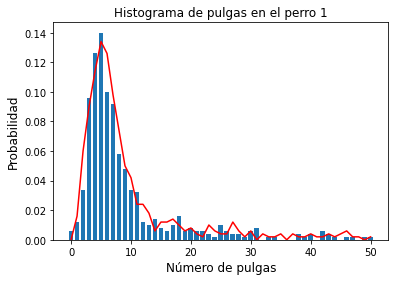

In [9]:
fig3 = plt.figure
plt.plot(T(51),Histograma(500),color='red')
plt.bar(T(51), Histograma(500))
plt.title("Histograma de pulgas en el perro 1")
plt.xlabel('Número de pulgas',size=12)
plt.ylabel('Probabilidad',size=12)
plt.show()

In [ ]:
V=[]
for i in range(len(y2(3))):
    B=y2(3)[i]
    C=factorialize(B)
    m=1
    d=1
    for k in C:
        print(float(k))

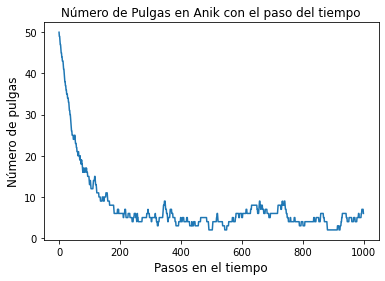

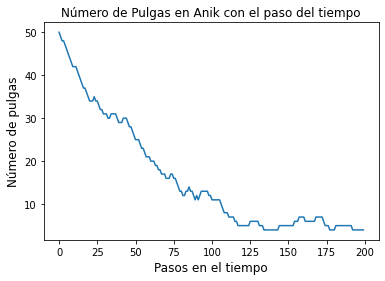

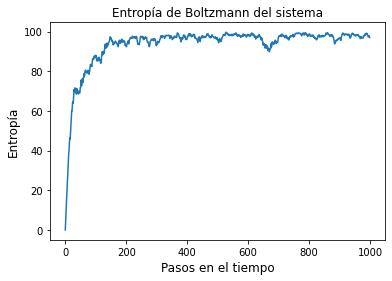

In [40]:
fig1 = plt.plot(T(1000),y(1000))
plt.title("Número de Pulgas en Anik con el paso del tiempo")
plt.ylabel('Número de pulgas',size=12)
plt.xlabel('Pasos en el tiempo',size=12)
plt.show()

fig2 = plt.plot(T(200),y(200))
plt.title("Número de Pulgas en Anik con el paso del tiempo")
plt.ylabel('Número de pulgas',size=12)
plt.xlabel('Pasos en el tiempo',size=12)
plt.show()

fig3 = plt.plot(T(1000),S(1000))
plt.title("Entropía de Boltzmann del sistema")
plt.xlabel('Pasos en el tiempo',size=12)
plt.ylabel('Entropía',size=12)
plt.show()